In [1]:
import os
import sys
import glob
import json
import requests
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
from PIL import Image, ImageSequence
tqdm.pandas()

C:\Users\infomax\Anaconda3\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.abspath(os.path.join(os.getcwd(), 'vision-test-293406-88bd539118c7.json'))

In [5]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    
#     return labels
    print('Labels:')

    for label in labels:
#         print(label)
        print(label.description)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

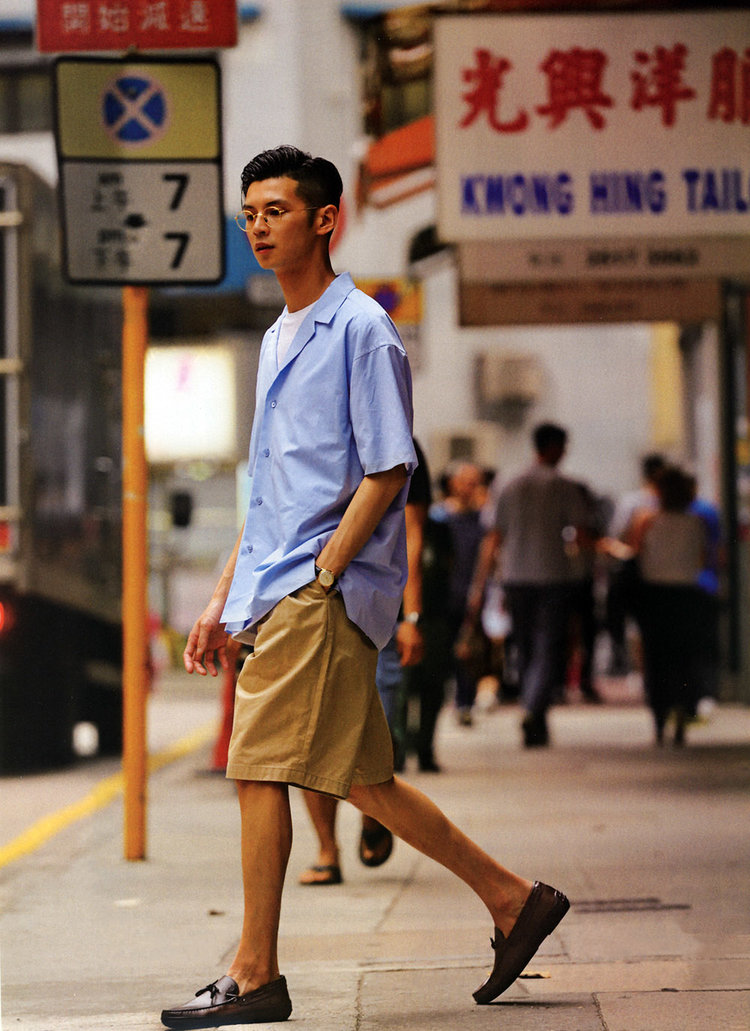

In [6]:
path = 'popeye-hk0011.jpg'
Image.open(path)

In [7]:
detect_labels(path)

Labels:
Photograph
Street fashion
Snapshot
Street
Fashion
Standing
Footwear
Human
Leg
Infrastructure


In [8]:
def detect_web(path):
    """Detects web annotations given an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.web_detection(image=image)
    annotations = response.web_detection

    if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            print('\nBest guess label: {}'.format(label.label))

#     if annotations.pages_with_matching_images:
#         print('\n{} Pages with matching images found:'.format(
#             len(annotations.pages_with_matching_images)))

#         for page in annotations.pages_with_matching_images:
#             print('\n\tPage url   : {}'.format(page.url))

#             if page.full_matching_images:
#                 print('\t{} Full Matches found: '.format(
#                        len(page.full_matching_images)))

#                 for image in page.full_matching_images:
#                     print('\t\tImage url  : {}'.format(image.url))

#             if page.partial_matching_images:
#                 print('\t{} Partial Matches found: '.format(
#                        len(page.partial_matching_images)))

#                 for image in page.partial_matching_images:
#                     print('\t\tImage url  : {}'.format(image.url))

#     if annotations.web_entities:
#         print('\n{} Web entities found: '.format(
#             len(annotations.web_entities)))

#         for entity in annotations.web_entities:
#             print('\n\tScore      : {}'.format(entity.score))
#             print(u'\tDescription: {}'.format(entity.description))

    if annotations.visually_similar_images:
        print('\n{} visually similar images found:\n'.format(
            len(annotations.visually_similar_images)))

        for image in annotations.visually_similar_images:
            print('\tImage url    : {}'.format(image.url))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [9]:
detect_web(path)


Best guess label: popeye magazine hong kong

10 visually similar images found:

	Image url    : https://i.pinimg.com/originals/5f/17/aa/5f17aa09a81c83321d16ad43c3e52521.jpg
	Image url    : https://i.pinimg.com/originals/f1/d5/dd/f1d5ddd2cd0e72f98527525865665bdd.jpg
	Image url    : https://i.pinimg.com/236x/dc/bb/cd/dcbbcdd6fab45c39cff75cfbb2594248--popeye-magazine-preppy-boys.jpg
	Image url    : https://i.pinimg.com/236x/b0/f1/47/b0f1470ede4272fbd5f0c7d0aedd9f8e--boys-style-mens-style.jpg
	Image url    : https://i.pinimg.com/236x/93/f1/1b/93f11bb1999a6ad8adfcdc9ec24e6e76--fashion-male-style-fashion.jpg
	Image url    : https://i.pinimg.com/originals/b1/bd/99/b1bd9931cbc0ed40d2293b8982963fed.jpg
	Image url    : https://i.pinimg.com/236x/c9/ae/21/c9ae21ba52fabe70543eaf2ab07d5c1c--menswear-classy.jpg
	Image url    : https://static1.squarespace.com/static/58d6f8f646c3c4bebcacf90e/58d70b5cf7e0ab027a0aae29/5ba15651758d46318f0c2d1e/1537365596320/40637377_1567931043308491_6152529120361614214_n

In [37]:
Image.open(path).thumbnail((50,50))